In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit

/Users/chitwood/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# read in image

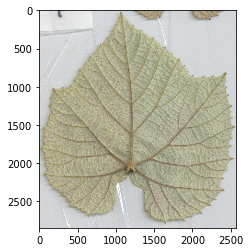

In [2]:
img=cv2.imread('grape_example2.jpg') # read in image
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert to RGB
plt.imshow(img)

# perform k means clustering

In [3]:
img=img.reshape((img.shape[1]*img.shape[0],3)) # reshape the image for k means

kmeans=KMeans(n_clusters=3) # perform k means
s=kmeans.fit(img)

labels=kmeans.labels_ # create labels for k means
labels=list(labels)

centroid=kmeans.cluster_centers_ # find centroid pixel colors
print(centroid)

[[178.25809604 177.00285326 149.39811419]
 [153.94028991 149.3474357  117.60890887]
 [210.18841001 212.89934511 215.05255832]]


[0.42283001082097943, 0.22781818840535129, 0.3493518007736693]


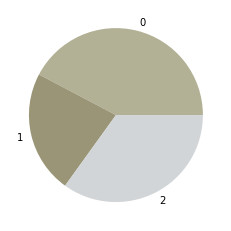

In [4]:
# Visualize percentage 

percent=[]

for i in range(len(centroid)):
  j = labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)

plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

# reassign pixel values to k means centroid values

row num is 2845 
col num is 2571


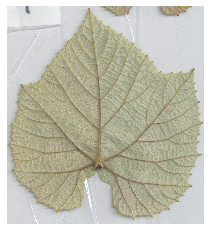

In [5]:
ori=cv2.imread('grape_example2.jpg') # read in original data
ori=cv2.cvtColor(ori,cv2.COLOR_BGR2RGB)
plt.imshow(ori)
plt.axis("off")

print("row num is", ori.shape[0], "\ncol num is", ori.shape[1] ) # print out row & col numbers


In [6]:
# create a new image array with pixel values set to pixel centroid k means groups

label_arr = np.array(labels)

new_img = label_arr.reshape(ori.shape[0],ori.shape[1],1)
zero_arr = np.zeros(shape=(ori.shape[0],ori.shape[1],3))

for i in range(ori.shape[0]):
    
    for j in range(ori.shape[1]):
        
        if new_img[i,j,:] == 0:
            zero_arr[i,j,:] = centroid[0] 
        if new_img[i,j,:] == 1:
            zero_arr[i,j,:] = centroid[1] 
        if new_img[i,j,:] == 2:
            zero_arr[i,j,:] = centroid[2]


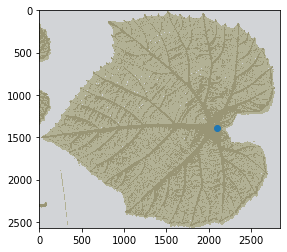

In [7]:
# visualize pixel color reassignments
# rotate leaf so in frame with polar conversion
# find coordinate values of petiolar junction for polar conversion

kmeans_img = (zero_arr).astype(np.uint8)
kmeans_img = cv2.rotate(kmeans_img, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(kmeans_img)

centerx = 2100
centery = 1390

plt.scatter(centerx,centery)

# convert to polar coordinates

(-0.5, 2569.5, 2570.5, -0.5)

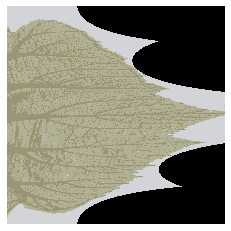

In [8]:
# ensure image is of the type float
img = kmeans_img.astype(np.float32)

# the following holds the square root of the sum of squares of the image dimensions ---
# this is done so that the entire width/height of the original image is used to express the complete circular range of the resulting polar image
value = np.sqrt(((img.shape[0]/2.0)**2.0)+((img.shape[1]/2.0)**2.0))

polar_image = cv2.linearPolar(img,(centerx, centery), value, cv2.WARP_FILL_OUTLIERS)

polar_image = polar_image.astype(np.uint8)

polar_image = polar_image[:,275:] # cut polar image

plt.imshow(polar_image)
plt.axis("off")



# create grayscale image with just vein pixels

(-0.5, 2569.5, 2570.5, -0.5)

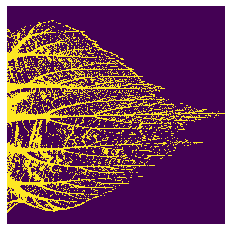

In [9]:
polar_zeros = np.zeros(shape=(polar_image.shape[0],polar_image.shape[1]))

for i in range(polar_image.shape[0]):
    
    for j in range(polar_image.shape[1]):
        
        if polar_image[i,j,0]==153:
        
            polar_zeros[i,j]=255
    
plt.imshow(polar_zeros)
plt.axis("off")

# iteratively erode and record how many erosions until each pixel disappears to segment veins


In [10]:
erosion_zeros = np.zeros(shape=(polar_image.shape[0],polar_image.shape[1]))
kernel = np.ones((5,5),np.uint8)
previous_erosion = polar_zeros

for e in range(40):
    
    current_erosion = cv2.erode(previous_erosion,kernel,iterations = 1)
    
    for i in range(current_erosion.shape[0]):
        
        for j in range(current_erosion.shape[1]):
            
            if current_erosion[i,j] != previous_erosion[i,j]:
                
                erosion_zeros[i,j] = e
                
    previous_erosion = current_erosion

    

(-0.5, 2569.5, 2570.5, -0.5)

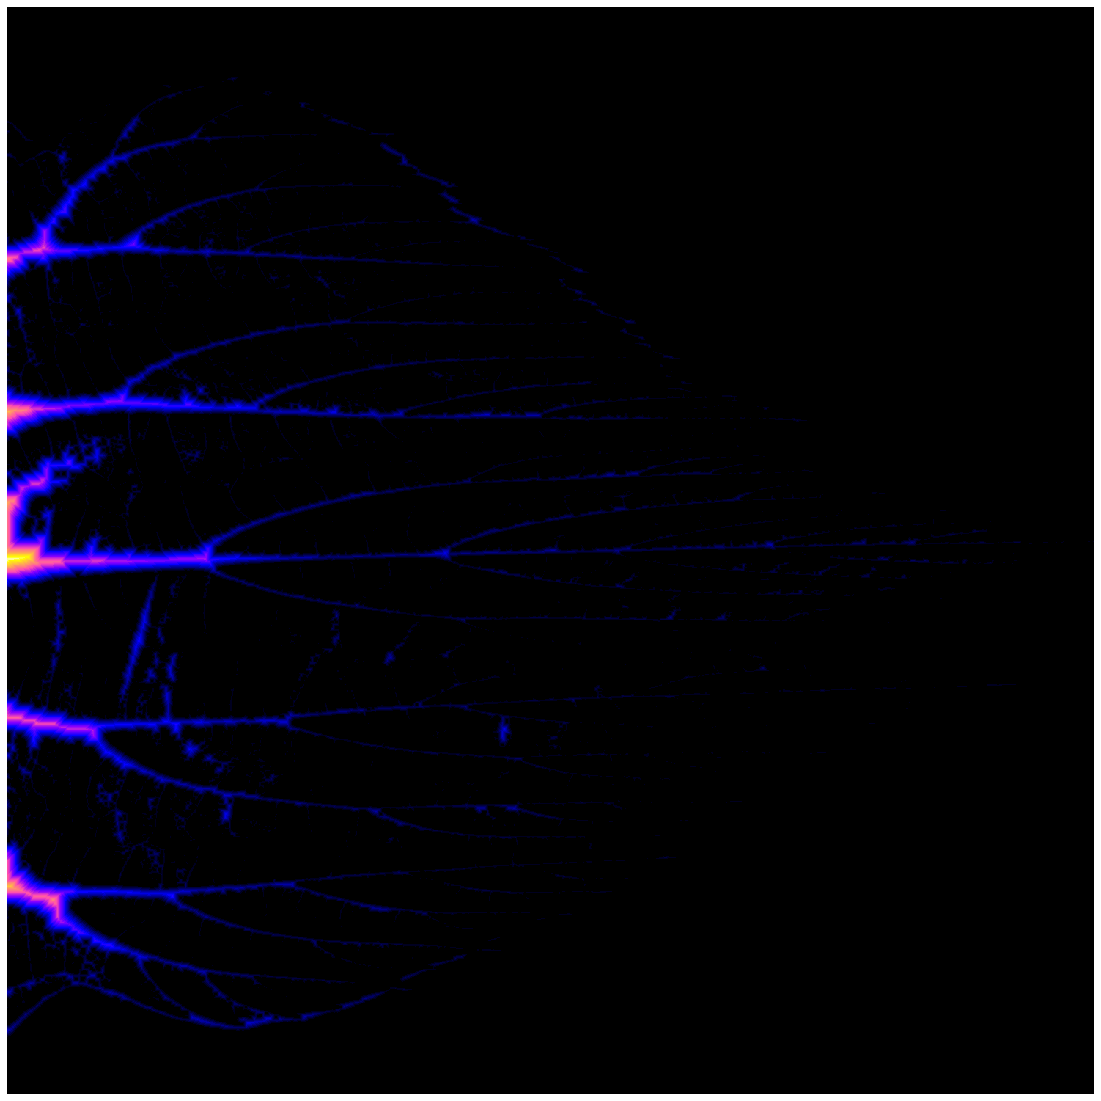

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(erosion_zeros, cmap="gnuplot2")
plt.axis("off")
